<img src="Images/logo.png">

# <center>Microsoft Movie Studio</center>

# Overview
***
This project's goal is to explore movie analytics to provide actionable insights for Microsoft's new Movie Studio. My goal for this project was to help aid Microsoft in creating a baseline structure which will assist them in deciding what factors are important to take into consideration when producing films! 

I carried out exploratory analyses on datasets containing information about movie titles, ratings, genres, gross income, and directors to create a selection of business models for Microsoft's consideration.

My analyses show that movies under the genres Action, Family, and Mystery, on average, have a higher gross box-office income. But, as far as movie ratings go, Drama and Non-Fiction movies tend to, on average, get higher ratings. This tells us that while Action/Family/Mystery movies generally make more money in the box-office, they are not perceived as well by critics.

My analyses also explores movie ratings (G, PG, PG-13, R, NR) and the distribution of total movies made through each category, as well as how well, on average, they are perceived by critics. This data shows that R rated movies are made at a much higher rate and on average are rated 'Fresh' on Rotten Tomatoes more often than any other movie rating

As a bonus, I have explored the Top 10 Movie Directors by the number of films they have directed and analyzed their average movie rating. This has shown that Stephen Spielberg has both made the highest number of movies, as well as has the highest average ratings. This tells us that he would be a excellent director to partner with.

# Business Problem
***
Questions I will be Analyzing:
* What is the distribution of movie ratings and number of movies produced based on genres?
* What movie genre, on average, makes the most amount of money in the box office?
* What is the distribution for number of movies made by movie rating (G, PG, PG-13, R, or NR), and what percent of them get good ratings? 

* Who would an ideal director be to get involved in a movie project?
***

The answers to these questions will allow Microsoft to decide what genres they should focus on as far as how well its perceived by critics and how much money it makes in the box office. It would also provide insight into what movie ratings would follow how the movie industry is trending.

# Data Understanding
---
The data used in this project was gathered from IMDB, Rotten Tomatoes, and Box Office Mojo

* ```imdb_title_basics```: IMDB data consisting of title ID, primary title name, original title name (if fireign or known by something else), start year, runtime minutes, and a string of genres separated by a comma
* ```imdb_title_ratings```: IMDB data consisting of title ID, average rating, and number of votes

* ```rt_movie_info```: Rotten Tomato data consisting of ID (which correlates to a unique movie), synopsis, rating, genres, Director, and other data that was not used for the purpose of this project

* ```rt_reviews```: Rotten Tomato data consisting of ID (many reviews per movie ID), rating, fresh/rotten, and other data not used for the purpose of this project

* ```bom.movie_gross```: BOM data consisting of movie title, studio, domestic gross, foreign gross, year

***

# Import Packages
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
***

## Data Preparation
```read_csv``` for all necessary data files

In [2]:
#CSV files needed for visualization of genre and ratings
imdb_title = pd.read_csv("Data/imdb.title.basics.csv.gz")
imdb_ratings = pd.read_csv("Data/imdb.title.ratings.csv.gz")

In [3]:
#CSV files for finding top directors and their average movie ratings
rt_movies = pd.read_csv("Data/rt.movie_info.tsv.gz", sep='\t')
rt_reviews = pd.read_csv("Data/rt.reviews.tsv.gz", sep='\t', encoding = "ISO-8859-1")

In [4]:
#CSV files for finding budgets
bom_gross = pd.read_csv('Data/bom.movie_gross.csv.gz')

## Data Exploration
Explore each dataframe for object types, column names, number of rows, and where there are null values

In [5]:
imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [8]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [9]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Data Merging
Preliminary merging data-frames where we will be analyzing data from two datasets 

In [10]:
#merge movie titles and ratings based on their common column 'tconst'
imdb_title_ratings = pd.merge(imdb_title, imdb_ratings, left_on='tconst', right_on='tconst')
imdb_title_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [11]:
#merge title_ratings dataframe with bom_gross to get the gross per movie title. Clean so there's no duplicates
movie_gross = pd.merge(imdb_title_ratings, bom_gross, left_on=['primary_title','start_year'], right_on=['title', 'year'])
movie_gross = movie_gross.sort_values(by='numvotes', ascending=False)
movie_gross_unique = movie_gross.drop_duplicates(subset='primary_title', keep='first')
movie_gross_unique.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
346,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception,WB,292600000.0,535700000,2010
330,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,The Dark Knight Rises,WB,448100000.0,636800000,2012
72,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar,Par.,188000000.0,489400000,2014
755,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,Django Unchained,Wein.,162800000.0,262600000,2012
121,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,275100000,2013


### Data Cleaning

##### 1. Clean up IMDB Title and Ratings Data-frames: Drop any rows with NULL values in the genre column

In [12]:
# remove any rows with NULL values in the Genre column for the IMDB titles/ratings dataframe
imdb_title_ratings_drop = imdb_title_ratings.dropna(subset=['genres'])

In [90]:
#Create a generalized list of popular genres to group movies into based on their 'genre' column
genres = ['Action', 'Comedy', 'Horror', 'Western', 'Documentary', 'Sci-Fi', 'Mystery', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance', 'Biography']

##### 2. Clean up Rotten Tomatoes Data-frame: Drop any rows with NULL values in the ratings column, as well as any ratings consisting of unintelligable characters

In [14]:
#Drop rows with NULL values in the rating column as well as any rows with Ratings that are unintelligable
rt_reviews_dropna = rt_reviews.dropna(subset=['rating'])
rt_reviews_drops = rt_reviews_dropna[(rt_reviews_dropna['rating'] != 'T') & \
                                  (rt_reviews_dropna['rating'] != 'N') & \
                                  (rt_reviews_dropna['rating'] != 'R') & \
                                  (rt_reviews_dropna['rating'] != '1-5') &\
                                  (rt_reviews_dropna['rating'] != '3 1/2') ]

In [15]:
#dictionary to map for converting ratings
grades = {'A+':9.9, 'A':9.5, 'A-':9.0, 'B+':8.9, 'B':8.5, 'B-':8.0, 'C+':7.9, 'C':7.5, 'C-':7.0, 'D+':6.9, 'D':6.5,'D-':6.0, 'F+':5.9, 'F':5.5, 'F-':5.0}

##### 3. Clean up Rotten Tomatoes Data-frame: Drop all rows without a value for 'fresh'

In [16]:
#Drop rows with NULL values in the fresh column
rt_reviews_fresh = rt_reviews.dropna(subset=['fresh'])

### Data Engineering

##### 1. Convert Rotten Tomatoes critics ratings (fresh or rotten) into 0 or 1 and aggregate totals by movie rating (G, PG, PG-13, R, NR)

In [17]:
#map into integers 0 and 1 whether fresh or rotton and drop any NULL values
rt_reviews_fresh['fresh_numeric'] = rt_reviews_fresh['fresh'].map(lambda x: 1 if x == 'fresh' else 0)
rt_reviews_fresh['rotten_numeric'] = rt_reviews_fresh['fresh'].map(lambda x: 1 if x == 'rotten' else 0)

In [18]:
#group by number of fresh and rotton
rt_reviews_fresh_grouped = rt_reviews_fresh.groupby(['id', 'fresh']).agg('sum')

In [19]:
#merge rt_reviews_fresh with rt_movies to get movie ratings
rt_reviews_fresh_merged = pd.merge(rt_movies, rt_reviews_fresh_grouped, left_on='id', right_on='id')

In [20]:
#split fresh and rotton up into different dataframes so we compare counts
rt_fresh = rt_reviews_fresh_merged[rt_reviews_fresh_merged['fresh_numeric'] >= rt_reviews_fresh_merged['rotten_numeric']]
rt_rotton = rt_reviews_fresh_merged[rt_reviews_fresh_merged['rotten_numeric'] > rt_reviews_fresh_merged['fresh_numeric']]

In [56]:
#combine them back into one dataframe to determine whether overall fresh or overall rotten
rt_fresh_comb = pd.merge(rt_fresh, rt_rotton, how='outer', left_on='id', right_on='id')
rt_fresh_comb['fresh_rotten'] = np.where((rt_fresh_comb['fresh_numeric_x'] >= rt_fresh_comb['rotten_numeric_y']), 1, 0)
rt_fresh_comb.head()

,id,synopsis_x,rating_x,genre_x,director_x,writer_x,theater_date_x,dvd_date_x,currency_x,box_office_x,...,theater_date_y,dvd_date_y,currency_y,box_office_y,runtime_y,studio_y,top_critic_y,fresh_numeric_y,rotten_numeric_y,fresh_rotten
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",...,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,17.0,0.0,60.0,1
1,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,...,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,4.0,0.0,5.0,1
2,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,...,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,10.0,0.0,25.0,1
3,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,...,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,6.0,0.0,19.0,1
4,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",...,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,16.0,0.0,58.0,0


In [55]:
#determine which movies are overall fresh
rt_fresh_split = rt_fresh_comb[rt_fresh_comb['fresh_rotten'] == 1]

In [53]:
#determine the number of movies per rating which are determined fresh
rt_fresh_grouped_rating = rt_fresh_split.groupby(['rating_x'])['fresh_rotten'].sum().reset_index()

```ratings```: movie ratings

```rt_ratings_totals```: number of total movies for each rating

```rt_fresh_totals```: number of total fresh movies for each rating

In [47]:
#Create a list of movie ratings for visualization
ratings = rt_fresh_grouped_rating['rating_x'].value_counts().sort_index().index
ratings

Index(['G', 'NR', 'PG', 'PG-13', 'R'], dtype='object')

In [50]:
#Number of total movies for each ratings (not split by fresh or rotten)
rt_ratings_totals = rt_fresh_comb['rating_x'].value_counts().sort_index().values

In [49]:
#Create a list of number of movies rated fresh per movie rating
rt_fresh_totals = rt_fresh_grouped_rating['fresh_rotten'].values
rt_fresh_totals

array([ 21, 123, 100,  92, 247])

##### 2. Convert Rotten Tomato ratings into comparable values to use for analysis for critic ratings for top directors

In [27]:
#converts ratings to percents if rating contains '/'
def conv_rating(rating):
    if '/' in rating:
        r = rating.split('/')
        return float(r[0])/float(r[1])*10
    elif rating in grades:
        return grades[rating]
    else:
        return float(rating)

In [28]:
#pass each rating into conv_rating method
rt_reviews_conv = rt_reviews_drops.copy()
rt_reviews_conv['conv_ratings'] = rt_reviews_conv['rating'].map(lambda x: conv_rating(x))

In [29]:
#Combine rows with matching ID column and take average of the ratings
rt_reviews_comb = rt_reviews_conv.groupby(['id'])['conv_ratings'].apply(lambda x: x.mean()).reset_index()

In [51]:
#merge Rotten Tomato movie Dataframe with the Ratings Dataframe
rt_movie_rev = pd.merge(rt_movies, rt_reviews_comb, left_on='id', right_on='id')
rt_movie_rev.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,conv_ratings
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,6.398673
1,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,6.945000
2,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,5.995122
3,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,7.142500
4,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,5.941803


```top_directors```: Top 10 directors by number of movies

```final_direct_ratings```: Average rating for each top directors movies

In [31]:
#Create a list of the top 10 directors for visualization
top_directors = rt_movie_rev['director'].value_counts().index[:10].values

In [32]:
#Take only the ratings with indexes that have a director in the top 10
top_direct_ratings = rt_movie_rev.loc[rt_movie_rev['director'].isin(top_directors)]

In [33]:
#Group by again so we can take the average rating of all the directors movies
final_direct_ratings = top_direct_ratings.groupby(['director'])['conv_ratings'].apply(lambda x: x.mean()).reset_index()


##### 3. Find the average rating for movies in IMDB Data-frame. Combine Genre data to make comparable and easy to visualize

In [92]:
#iterate through each title in title list to find average rating. add avg rating to list on actor/director name
def find_rating(title_list):
    avg_rating = 0
    len_list = len(title_list)
    for title in title_list:
        row = imdb_ratings.loc[imdb_ratings['tconst'] == title]
        if len(row['averagerating'].values) > 0:
            avg_rating += row['averagerating'].values[0]
        else:
            len_list -= 1
    return avg_rating

In [93]:
#helper method to generalize genre
def find_genre(genre_list):
    for gen in genre_list:
        if gen in genres:
            return gen

In [94]:
#assigns one genre to movie to make easier to group and organize. Make copy beforehad to avoid warnings
imdb_title_ratings_map = imdb_title_ratings_drop.copy()
imdb_title_ratings_map['overall_genre'] = imdb_title_ratings_map['genres'].map(lambda x: find_genre(x.split(',')))
imdb_title_ratings_map.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,overall_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy


the following data-frames are used for visualizing the distribution of each genre

In [95]:
#groups genres into similar categories to make easier to visualize 
ratings_action_scifi = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Action') |(imdb_title_ratings_map['overall_genre'] == 'Sci_Fi') | (imdb_title_ratings_map['overall_genre'] == 'Fantasy')]
ratings_comedy = imdb_title_ratings_map[imdb_title_ratings_map['overall_genre'] == 'Comedy']
ratings_horror = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Thriller') | (imdb_title_ratings_map['overall_genre'] == 'Horror')]
ratings_drama = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Drama') | (imdb_title_ratings_map['overall_genre'] == 'Romance')]
ratings_nonfiction = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Biography') | (imdb_title_ratings_map['overall_genre'] == 'Documentary')]
ratings_other = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Family') | (imdb_title_ratings_map['overall_genre'] == 'Mystery') | \
                                          (imdb_title_ratings_map['overall_genre'] == 'Western') | (imdb_title_ratings_map['overall_genre'] == 'Other')]


##### 5. Find the average domestic_gross for each generalized genre

In [96]:
#Use the find_genre method to generalize genre for visualization correlating domestic_gross and genre
movie_gross_map = movie_gross_unique.copy()
movie_gross_map['overall_genre'] = movie_gross_map['genres'].map(lambda x: find_genre(x.split(',')))

In [100]:
#Create a list of genres and corresponding average domestic_gross
avg_gross_by_genre = movie_gross_map.groupby(['overall_genre'])['domestic_gross'].apply(lambda x: x.mean()).reset_index()
avg_genre = avg_gross_by_genre['overall_genre'].values
avg_gross = avg_gross_by_genre['domestic_gross'].values

# Visualizations
***

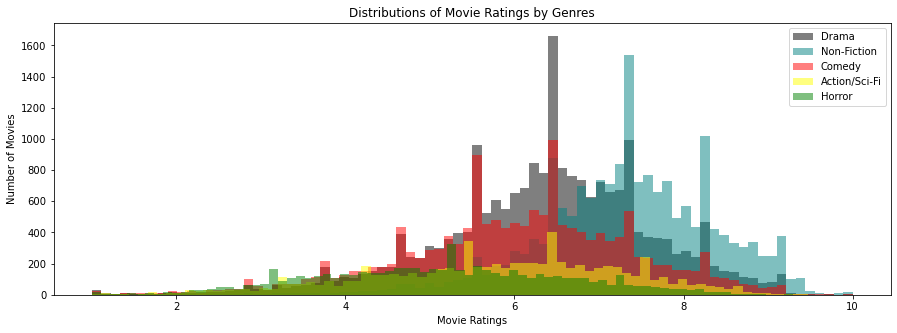

In [98]:
# Visualization for mapping a distribution of movie ratings by genre
fig, ax = plt.subplots(figsize=(15,5))
bins = 80

ax.hist(x=ratings_drama['averagerating'], label="Drama",
    bins=bins,
    color="black",
    alpha=0.5)
ax.hist(x=ratings_nonfiction['averagerating'], label="Non-Fiction",
    bins=bins,
    color="teal",
    alpha=0.5)
ax.hist(x=ratings_comedy['averagerating'], label="Comedy",
    bins=bins,
    color="red",
    alpha=0.5)
ax.hist(x=ratings_action_scifi['averagerating'], label="Action/Sci-Fi",
    bins=bins,
    color="yellow",
    alpha=0.5)
ax.hist(x=ratings_horror['averagerating'], label="Horror",
    bins=bins,
    color="green",
    alpha=0.5)


# Customize labels
ax.set_title("Distributions of Movie Ratings by Genres")
ax.set_xlabel("Movie Ratings")
ax.set_ylabel("Number of Movies")
ax.legend()
plt.savefig("./Images/movie_ratings_by_genre.png", dpi=150);

```Average rating for Drama: 6.3470974044097135
Average rating for Non-Fiction: 7.292722416048845
Average rating for Comedy: 6.005628121398386
Average rating for Action/Sci-FI: 5.806539581678581
Average rating for Horror: 5.108700999231361```

In [41]:
ratings_drama['averagerating'].describe()

count    21498.000000
mean         6.347097
std          1.273435
min          1.000000
25%          5.600000
50%          6.400000
75%          7.200000
max         10.000000
Name: averagerating, dtype: float64

In [42]:
print('Average rating for Drama: {}'.format(ratings_drama['averagerating'].mean()))
print('Average rating for Non-Fiction: {}'.format(ratings_nonfiction['averagerating'].mean()))
print('Average rating for Comedy: {}'.format(ratings_comedy['averagerating'].mean()))
print('Average rating for Action/Sci-FI: {}'.format(ratings_action_scifi['averagerating'].mean()))
print('Average rating for Horror: {}'.format(ratings_horror['averagerating'].mean()))

Average rating for Drama: 6.3470974044097135
Average rating for Non-Fiction: 7.292722416048845
Average rating for Comedy: 6.005628121398386
Average rating for Action/Sci-FI: 5.806539581678581
Average rating for Horror: 5.108700999231361


---

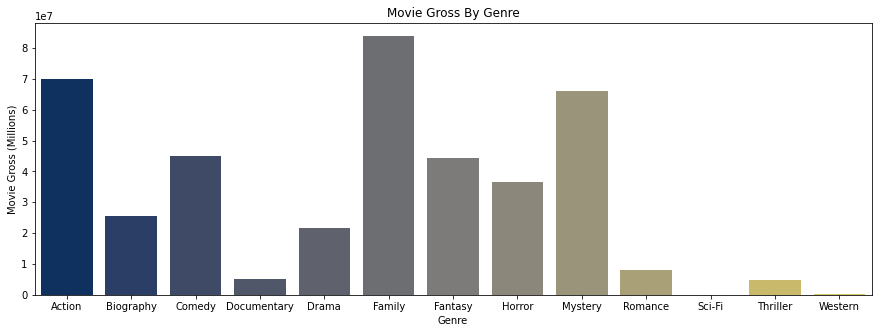

In [101]:
# Visualization for mapping a distribution of movie box office income by genre
fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(x=avg_genre, y=avg_gross, palette='cividis')

ax.set_title("Movie Gross By Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Movie Gross (Millions)")
plt.savefig("./Images/movie_gross_by_genre.png", dpi=150);

---

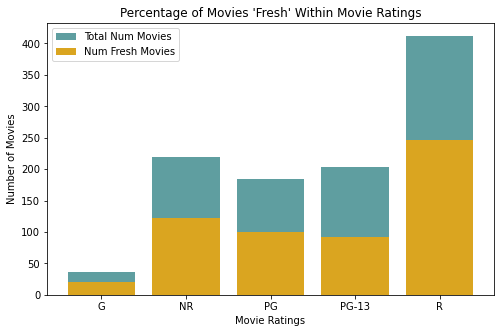

In [44]:
# Visualization for mapping number of movies per rating and how 'fresh' they are perceived by critics
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(ratings, rt_ratings_totals, color='cadetblue', label='Total Num Movies')
ax.bar(ratings, rt_fresh_totals, color='goldenrod', label='Num Fresh Movies') # percent that are fresh vs rotton


# Customize labels
ax.set_title("Percentage of Movies 'Fresh' Within Movie Ratings")
ax.set_xlabel("Movie Ratings")
ax.set_ylabel("Number of Movies")
ax.legend()
plt.savefig("./Images/freshness_by_movie_rating.png", dpi=150);

In [45]:
perc = (rt_fresh_totals/rt_ratings_totals)*100
perc

array([56.75675676, 55.90909091, 54.34782609, 45.32019704, 59.95145631])

``` G: 57% Fresh
NR: 56% Fresh
PG: 54% Fresh
PG-13: 45% Fresh
R: 60% Fresh```

---

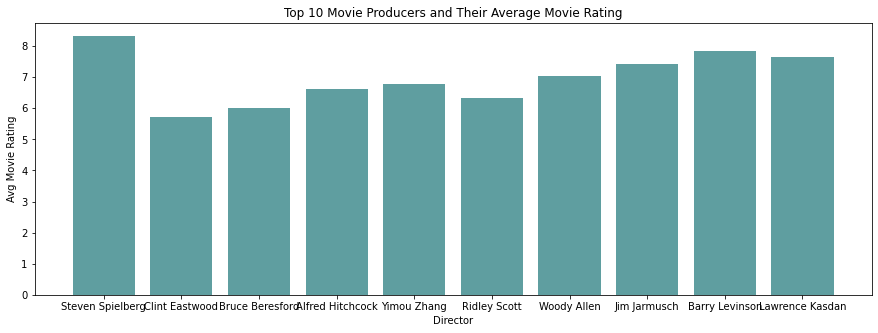

In [46]:
# Visualization for mapping top 10 directors and their average movie ratings
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(top_directors, final_direct_ratings['conv_ratings'], color='cadetblue')

ax.set_title("Top 10 Movie Producers and Their Average Movie Rating")
ax.set_xlabel('Director')
ax.set_ylabel('Avg Movie Rating')
plt.savefig("./Images/top_movie_directors_ratings.png", dpi=150);

# Conclusion
***

This analysis leads to three recommendations for movie productions:
1. Action or Family based on gross box-office income
2. Documentary or Biography based on viewer/critic ratings
3. R rated movie based on overall critic response

(Bonus would be to get Steven Spielberg to direct the movie, fortunately he directs a lot of Action/Sci-Fi movies, so this correlates to high gross box-office income as well)


# Next Steps
***

Further Questions to Consider?

* Who are some up of the top up and coming actors? People who have had a recent increase in roles and are expected to continue to thrive

* How have the popularities of genres changed over time? Number of movies for each genre over time? Ratings of each genre over time?

